1. La viscocidad cinética $\mu_k$ del agua varía con la temperatura $T$ de la siguiente manera:

 | $T~(°C)$ | $\mu_k~(10^{-3}m^2/s)$ |
 | --- | --- |
 | 0 | 0.101 |  
 | 21.1 | 1.79  |  
 | 37.8 | 1.13  |  
 | 54.4 | 0.696 |
 | 71.1 | 0.519 |
 | 87.8 | 0.338 |
 | 100  | 0.296 | 

 Utilice el método de su preferencia para interpolar $\mu_k$ en $T=$ 10°, 30°, 60° y 90°C.

For x = 10.0, y = 1.6707
For x = 30.0, y = 1.4539
For x = 60.0, y = 0.6242
For x = 90.0, y = 0.3165

Polinomio de Interpolación de Lagrange:
y(x) = 0.0848341232227488*x*(1.26742712294043 - 0.0126742712294043*x)*(1.31634182908546 - 0.0149925037481259*x)*(1.422 - 0.02*x)*(1.63363363363363 - 0.03003003003003*x)*(2.26347305389222 - 0.0598802395209581*x) + 0.0298941798941799*x*(1.60771704180064 - 0.0160771704180064*x)*(1.756 - 0.02*x)*(2.13513513513514 - 0.03003003003003*x)*(3.27710843373494 - 0.0602409638554217*x)*(0.0598802395209581*x - 1.26347305389222) + 0.0127941176470588*x*(2.19298245614035 - 0.0219298245614035*x)*(2.62874251497006 - 0.029940119760479*x)*(4.25748502994012 - 0.0598802395209581*x)*(0.03003003003003*x - 0.633633633633634)*(0.0602409638554217*x - 2.27710843373494) + 0.00729957805907173*x*(3.46020761245675 - 0.0346020761245675*x)*(5.25748502994012 - 0.0598802395209581*x)*(0.02*x - 0.422)*(0.03003003003003*x - 1.13513513513514)*(0.0598802395209581*x - 3.25748502994012) + 0.

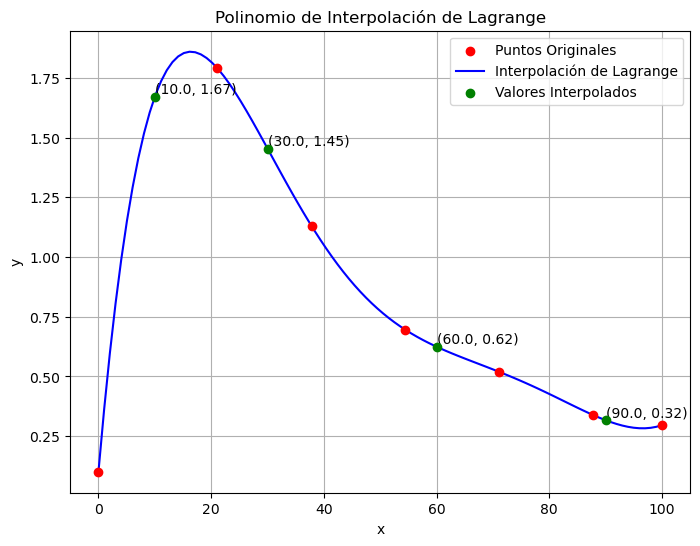

[1.6707186751769172, 1.45385802372515, 0.6241675563229642, 0.31653616798129963]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


def lagrange_1(x_points, y_points, xp_list):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange para múltiples valores.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp_list (list or array): Lista de puntos en los que se desea interpolar.

    Retorna:
    y_results (list): Lista de valores interpolados en xp_list.
    """
    x = sp.Symbol("x")

    # Polinomio de Lagrange simbólico
    def lagrange_basis_symbolic(i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    polinomio = sum(y_points[i] * lagrange_basis_symbolic(i) for i in range(len(x_points)))
    polinomio_simplificado = sp.expand(polinomio)

    # Evaluación numérica de la interpolación
    def lagrange_basis(xp, i):
        factors = [(xp - x_points[j]) / (x_points[i] - x_points[j]) for j in range(len(x_points)) if j != i]
        return np.prod(factors)

    def lagrange_interpolation(xp):
        return sum(y_points[i] * lagrange_basis(xp, i) for i in range(len(x_points)))

    # Calcular valores interpolados
    y_results = [lagrange_interpolation(xp) for xp in xp_list]

    # Imprimir resultados
    for xp, yp in zip(xp_list, y_results):
        print(f"For x = {xp:.1f}, y = {yp:.4f}")

    print("\nPolinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [lagrange_interpolation(x_val) for x_val in x_interpolado]

    # Graficar
    plt.figure(figsize=(8, 6))
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red", zorder=3)
    plt.plot(x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-", color="blue")
    plt.scatter(xp_list, y_results, color="green", zorder=4, label="Valores Interpolados")

    for xp, yp in zip(xp_list, y_results):
        plt.text(xp, yp, f"({xp:.1f}, {yp:.2f})", fontsize=10, verticalalignment="bottom")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)
    plt.show()

    return y_results


# Valores de prueba
x_points = [0, 21.1, 37.8, 54.4, 71.1, 87.8, 100]
y_points = [0.101, 1.79, 1.13, 0.696, 0.519, 0.338, 0.296]

# Definir múltiples valores de x a interpolar
xp_list = [10, 30, 60, 90]  # Puedes agregar más valores aquí

# Ejecutar la interpolación
lagrange_1(x_points, y_points, xp_list)


2. La tabla muestra como la densidad relativa $\rho$ del aire varía con la altura $h$. Determine mediante interpolación de Lagrange la densidad relativa del aire a 10.5 km.

 | $h~(km)$ | $\rho$ |
 | --- | --- |
 | 0 | 1 |  
 | 1.525 | 0.8617  |  
 | 3.050 | 0.7385  |  
 | 4.575 | 0.6292 |
 | 6.10 | 0.5328 |
 | 7.625 | 0.4481 |
 | 9.150  | 0.3741 | 

For x = 10.5, y = 0.3


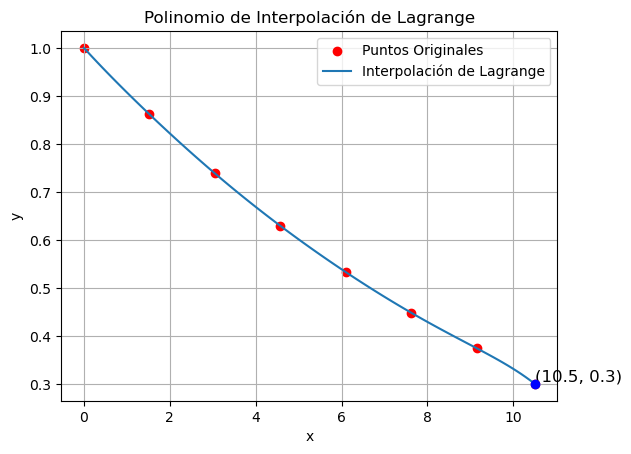

Polinomio de Interpolación de Lagrange:
y(x) = 0.565049180327869*x*(1.16991643454039 - 0.11142061281337*x)*(1.2 - 0.131147540983607*x)*(1.25 - 0.163934426229508*x)*(1.33333333333333 - 0.218579234972678*x)*(1.5 - 0.327868852459016*x)*(2.0 - 0.655737704918033*x) + 0.242131147540984*x*(1.40939597315436 - 0.134228187919463*x)*(1.5 - 0.163934426229508*x)*(1.66666666666667 - 0.218579234972678*x)*(2.0 - 0.327868852459016*x)*(3.0 - 0.655737704918033*x)*(0.655737704918033*x - 1.0) + 0.137530054644809*x*(1.77215189873418 - 0.168776371308017*x)*(2.0 - 0.218579234972678*x)*(2.5 - 0.327868852459016*x)*(4.0 - 0.655737704918033*x)*(0.327868852459016*x - 0.5)*(0.655737704918033*x - 2.0) + 0.087344262295082*x*(2.38636363636364 - 0.227272727272727*x)*(3.0 - 0.327868852459016*x)*(5.0 - 0.655737704918033*x)*(0.218579234972678*x - 0.333333333333333)*(0.327868852459016*x - 1.0)*(0.655737704918033*x - 3.0) + 0.0587672131147541*x*(3.65217391304348 - 0.347826086956522*x)*(6.0 - 0.655737704918033*x)*(0.16393442

In [14]:


def lagrange_1(x_points, y_points, xp):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp (float): Punto en el que se desea interpolar.

    Retorna:
    yp (float): Valor interpolado en xp.
    """
    m = len(x_points)
    n = m - 1
    # Definir la variable simbólica
    x = sp.symbols("x")

    # Función para calcular los polinomios básicos de Lagrange
    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    # Función para calcular el polinomio de Lagrange
    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular el valor interpolado
    yp = lagrange_interpolation(xp, x_points, y_points)
    print("For x = %.1f, y = %.1f" % (xp, yp))

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar el polinomio de interpolación de Lagrange
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar el valor interpolado
    plt.scatter(xp, yp, color="blue", zorder=5)
    plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")

    # Añadir etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    # Construir el polinomio de interpolación simbólicamente
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    # Simplificar el polinomio
    polinomio_simplificado = sp.simplify(polinomio)

    # Imprimir el polinomio de interpolación
    print("Polinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp
try:
    x_points = [0, 1.525, 3.050, 4.575, 6.10, 7.625, 9.150,10.5]
    y_points = [1, 0.8617, 0.7385, 0.6292, 0.5328, 0.4481, 0.3741, 0.3]
    xp = float(input("Enter x: "))
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")


3. La amplitud vibracional de un eje de transmisión es medida a varias velocidades. Los resultados son

 | $Velocidad~(rpm)$ | $Amplitud~(mm)$ |
 | --- | --- |
 | 0 | 0 |  
 | 400 | 0.072  |  
 | 800 | 0.233  |  
 | 1200 | 0.712 |
 | 1600 | 3.400 |

Utilice el método de interpolación más conveniente para graficar amplitud vs velocidad de 0 a 2500rpm (observe los intervalos de la tabla y determine el tamaño más conveniente de los intervalos).

For x = 2500.0, y = 38.6


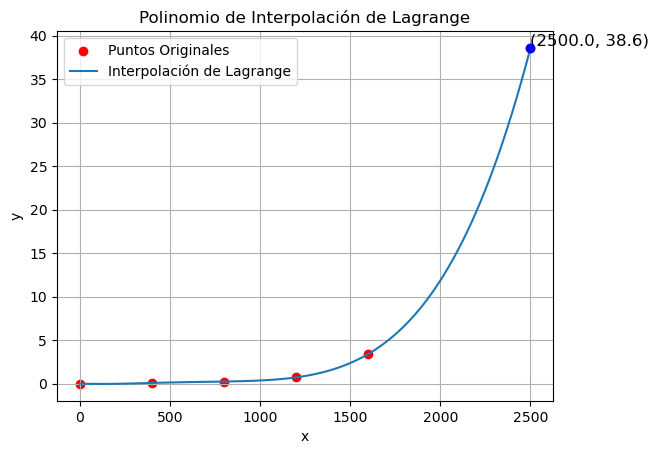

Polinomio de Interpolación de Lagrange:
y(x) = 0.00018*x*(25/21 - x/2100)*(4/3 - x/1200)*(3/2 - x/800)*(2 - x/400) + 0.00029125*x*(25/17 - x/1700)*(2 - x/800)*(3 - x/400)*(x/400 - 1) + 0.000593333333333333*x*(25/13 - x/1300)*(4 - x/400)*(x/800 - 1/2)*(x/400 - 2) + 0.002125*x*(25/9 - x/900)*(x/1200 - 1/3)*(x/800 - 1)*(x/400 - 3) + 0.01544*x*(x/2100 - 4/21)*(x/1700 - 8/17)*(x/1300 - 12/13)*(x/900 - 16/9)

Polinomio Simplificado:
y(x) = x*(-1.75116788168391e-18*x**4 + 2.71208279652674e-12*x**3 - 5.90563987347077e-9*x**2 + 4.32904123722139e-6*x - 0.000780242584213175)


In [13]:
try:
    x_points = [0, 400, 800, 1200,1600,2500]
    y_points = [0, 0.072, 0.233, 0.712, 3.400, 38.6]
    xp = float(input("Enter x: "))
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")